# Airbnb Data Analysis & Price Prediction

This script can be broadly distributed into three parts
1) Data Cleaning
2) Data Visualization
3) Creating Machine Learning Model

Please use the submitted excel file to import the raw data and run the whole script at once to see the results

# Data Cleaning

In this section we will import the dataset and clean the data.

In [1]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import geopy
import geopy.distance
pd.set_option('display.max_columns',None)

In [2]:
#Importing Data
df = pd.read_excel('/Users/nishantparate/Documents/UCI/Quarter 2/Data & Programming for Analytics/Project/Open Data/Original/airbnb-listings_original_py.xls')

In [3]:
df.head(25)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,4917301,https://www.airbnb.com/rooms/4917301,20170502172350,2017-05-02,Studio Under House!,This studio is fantastic! Such a beautiful spa...,NaN,This studio is fantastic! Such a beautiful spa...,none,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/61653511/d...,https://a0.muscache.com/im/pictures/61653511/d...,https://public.opendatasoft.com/api/datasets/1...,https://a0.muscache.com/im/pictures/61653511/d...,24035721,https://www.airbnb.com/users/show/24035721,Michael,2014-11-22,"Los Angeles, California, United States",NaN,NaN,NaN,NaN,https://a0.muscache.com/im/users/24035721/prof...,https://a0.muscache.com/im/users/24035721/prof...,Woodland Hills/Warner Center,1.0,1.0,"email,phone,jumio","Woodland Hills/Warner Center, Los Angeles, CA ...",Woodland Hills/Warner Center,Woodland Hills,NaN,Los Angeles,CA,91364,Los Angeles,"Los Angeles, CA",US,United States,34.147756,-118.591338,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Air conditioning,Free par...",NaN,150.0,NaN,NaN,NaN,NaN,1,0,1,1125,29 months ago,NaN,30,60,90,365,2017-05-02,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"City of Los Angeles, CA",flexible,1,NaN,"34.14775649234191, -118.59133780081316","Host Has Profile Pic,Is Location Exact"
1,18240041,https://www.airbnb.com/rooms/18240041,20170502172350,2017-05-03,4BD/3.5Bth Pool Home w/ Game Room in the Hills,"Charming and grand, yet comfortable pool home!...",-4 bedrooms (each w/ queen beds) -3.5 bathroom...,"Charming and grand, yet comfortable pool home!...",none,Woodland Hills is a very nice and affluent cit...,NaN,NaN,Guests can use anything inside the house. Feel...,I am available via text messages. Please text ...,- No rearranging or modifications to any of th...,https://a0.muscache.com/im/pictures/7ad6459a-2...,https://a0.muscache.com/im/pictures/7ad6459a-2...,https://public.opendatasoft.com/api/datasets/1...,https://a0.muscache.com/im/pictures/7ad6459a-2...,57197381,https://www.airbnb.com/users/show/57197381,Daniel,2016-02-02,"Arcadia, California, United States",A 25 year old Taiwanese/Korean American who lo...,within a day,100.0,NaN,https://a0.muscache.com/im/pictures/bf63b574-7...,https://a0.muscache.com/im/pictures/bf63b574-7...,Woodland Hills/Warner Center,1.0,1.0,"email,phone,facebook,reviews,kba","Woodland Hills/Warner Center, Los Angeles, CA ...",Woodland Hills/Warner Center,Woodland Hills,NaN,Los Angeles,CA,91364,Los Angeles,"Los Angeles, CA",US,United States,34.164597,-118.600512,House,Entire home/apt,8,3.5,4.0,4.0,Real Bed,"Wireless Internet,Air conditioning,Pool,Kitche...",NaN,175.0,NaN,NaN,300.0,150.0,8,25,2,1125,today,NaN,9,19,28,28,2017-05-03,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"City of Los Angeles, CA",flexible,1,NaN,"34.16459

In [4]:
#Removing the unnecessary columns 
df1 = df.drop(df.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,23,24,28,29,30,31,33,34,35,36,37,41,
                          42,43,53,61,62,65,66,71,73,74,83,85,86,88]],axis=1)

In [5]:
# Finding % of null values in columns
df1_null = df1.isna().sum()*100 /len(df1.index)

# Filtering colmns which have nulls more than 50%
null_col = df1_null[df1_null >50].index
list(null_col)

['Host Acceptance Rate',
 'Square Feet',
 'Weekly Price',
 'Monthly Price',
 'Security Deposit',
 'License']

In [6]:
# Removing Columns with null percentage more than 50%
df2 = df1.drop(null_col,axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           16383 non-null  int64         
 1   Host ID                      16383 non-null  int64         
 2   Host Since                   16378 non-null  datetime64[ns]
 3   Host Response Time           13266 non-null  object        
 4   Host Response Rate           13266 non-null  float64       
 5   Host Total Listings Count    16378 non-null  float64       
 6   City                         16383 non-null  object        
 7   State                        16383 non-null  object        
 8   Zipcode                      16193 non-null  object        
 9   Country                      16383 non-null  object        
 10  Latitude                     16383 non-null  float64       
 11  Longitude                    16383 non-nu

In [7]:
#Removing rows which has more than 6 null values
df3 = df2[(df2.isnull().sum(axis = 1)) < 6]

In [8]:
# Dropping rows which has 'Host Since' Column as null
df4 = df3.drop(list(df3[df3['Host Since'].isnull()].index),axis=0)

In [9]:
# Dropping rows which has 'Host Response Time' as null
df5 = df4.drop(list(df4[df4['Host Response Time'].isnull()].index),axis=0)

In [10]:
# Dropping rows which has 'Price' as null
df6 = df5.drop(list(df5[df5['Price'].isnull()].index),axis=0)

In [11]:
# Dropping rows which has 'Amenities' as null
df7 = df6.drop(list(df6[df6['Amenities'].isnull()].index),axis=0)

In [12]:
# Rows with null zipcode
df_null_zip = df7[df7['Zipcode'].isnull()]

In [13]:
# Getting zipcode from latitide and long (takes time to run)
def get_zipcode(df, geolocator, lat_field, lon_field):
    location = geolocator.reverse((df[lat_field], df[lon_field]))
    return location.raw['address']['postcode']


geolocator = geopy.Nominatim(user_agent='http')


zipcodes = df_null_zip.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='Latitude', lon_field='Longitude')

In [14]:
#Adding missing zip codes as a column in dataframe
df7['Zip_new'] = zipcodes 

In [15]:
# Replacing null zipcodes with actual code
df7['Zipcode'] = np.where(df7['Zipcode'].isna(),df7['Zip_new'], df7['Zipcode'])

In [16]:
#Dropping the extra column
df8 = df7.drop('Zip_new',axis=1)

In [17]:
# Calculating the multiplication factor to calculate the number of bathrooms
x = (df8['Accommodates'].mean())/(df8['Bathrooms'].mean())

In [18]:
# Replacing null 'Bathroom' column with calculated value
df8['Bathrooms'] = np.where(df8['Bathrooms'].isna(),round((df8['Accommodates'])/x), df8['Bathrooms'])

In [19]:
# Calculating the multiplication factor to calculate the number of bedroom
y = (df8['Accommodates'].mean())/(df8['Bedrooms'].mean())

In [20]:
# Replacing null 'Bedrooms' column with calculated value
df8['Bedrooms'] = np.where(df8['Bedrooms'].isna(),round((df8['Accommodates'])/y), df8['Bedrooms'])

In [21]:
# Replacing null 'Beds' column with calculated value
df8['Beds'] = np.where(df8['Beds'].isna(),df8['Bedrooms'], df8['Beds'])

In [22]:
# Replacing null 'Cleaning Fee' column with its mean value
df8['Cleaning Fee'] = np.where(df8['Cleaning Fee'].isna(),round(df8['Cleaning Fee'].mean()), df8['Cleaning Fee'])

In [23]:
# Replacing null Review Scores with proportional review score rating
df8['Review Scores Accuracy'] = np.where(df8['Review Scores Accuracy'].isna(),round(df8['Review Scores Rating']/10), df8['Review Scores Accuracy'])

df8['Review Scores Cleanliness'] = np.where(df8['Review Scores Cleanliness'].isna(),round(df8['Review Scores Rating']/10), df8['Review Scores Cleanliness'])

df8['Review Scores Checkin'] = np.where(df8['Review Scores Checkin'].isna(),round(df8['Review Scores Rating']/10), df8['Review Scores Checkin'])

df8['Review Scores Communication'] = np.where(df8['Review Scores Communication'].isna(),round(df8['Review Scores Rating']/10), df8['Review Scores Communication'])

df8['Review Scores Location'] = np.where(df8['Review Scores Location'].isna(),round(df8['Review Scores Rating']/10), df8['Review Scores Location'])

df8['Review Scores Value'] = np.where(df8['Review Scores Value'].isna(),round(df8['Review Scores Rating']/10), df8['Review Scores Value'])


In [24]:
#Function to count amenities
def count_amenities(x):
    count = 0
    for i in x:
        if i == ',':
            count = count+1
    return count + 1
    

In [25]:
#Creating a new copy
df9 = df8

In [26]:
#Adding a new column for number of amenities
df9['No_Amenities'] = df9['Amenities'].apply(lambda x:count_amenities(x))

In [27]:
df9.drop('Amenities',axis=1,inplace=True)

In [28]:
# Function to calculate distance from airport
def Air_dist(x):
    y='33.942791,-118.410042'
    z = geopy.distance.geodesic(x,y).miles
    return round(z)

In [29]:
#Adding a new column for distance from airport
df9['Dist_to_Airp'] = df9['Geolocation'].apply(lambda x:Air_dist(x))

In [30]:
df9.reset_index(inplace=True)

In [31]:
df9.drop('index',axis = 1,inplace=True)

In [32]:
df9.shape

(10942, 38)

In [33]:
df = df9

# Exploratory Data Analysis

In this section we will visualize the data to get actionable insights

In [34]:
#Importing necessary Libraries
import geopy
import geopy.distance
import plotly
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
pd.set_option('display.max_columns',None)
import folium
import plotly.express as px

In [35]:
cf.go_offline()

In [36]:
#General Price Distribution
df['Price'].iplot(title='Price Distribution',xTitle ='Price',yTitle='Count',kind='hist',bins=50)

In [37]:
#Finding the coorelation between Price and other attribute
corr_match = df.corrwith(df['Price'],method = 'spearman')

#Converting it to a dataframe
corr_df = pd.DataFrame(corr_match).sort_values(by=0,ascending=False)

#Resetting the index to plot the values
corr_df.reset_index(inplace = True)

#Plotting the coorelation values
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            x=corr_df[0],
            y=corr_df['index'],
            orientation='h',
            ))
fig.update_layout(
    autosize=False,
    width=1000,
    height=800)

fig.show()

In [38]:
#Grouping the properties by the number of people it can accommodate
df_Acc = df.groupby('Accommodates').mean()

#Resetting the index to plot the values
df_Acc.reset_index(inplace = True)

# Plotting a bubble chart to show the trend
fig = px.scatter(df_Acc, x="Accommodates", y="No_Amenities",
	         size="Price",color ="Cleaning Fee",
                  size_max=60)
fig.show()

In [39]:
#Limiting the columns for new visualization
Value_Price = df[['Price','Cleaning Fee','Review Scores Rating']]

#Creating Total column to calculate the percentage
Value_Price['Total']=Value_Price['Price']+Value_Price['Cleaning Fee']

#Adding new percentage columns
Value_Price['Clean_Per']= (Value_Price['Cleaning Fee'] * 100)/Value_Price['Total']
Value_Price['Price_Per']= (Value_Price['Price'] * 100)/Value_Price['Total']

#Creating a new dataframe with mean values
Value_Price_Mean = pd.DataFrame(Value_Price[['Clean_Per','Price_Per']].mean())

#Resetting index to get the column values to be ploted
Value_Price_Mean.reset_index(inplace=True)

#Plotting the percentage values
fig = px.pie(Value_Price_Mean, values=0,names = 'index')
fig.show()

In [40]:
#Ploting the property location and their price

fig = px.scatter_mapbox(df,
                       lon = df['Longitude'],
                       lat = df['Latitude'],
                       zoom = 12,
                       color = df['Price'],
                    width = 1200,
                        height = 900,
                        title = 'Air bnb Properties in LA'
                       )

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'r':0,'t':50,'l':0,'b':10})
fig.show()

In [41]:
#Plotting Number of Amenities with Price
df.groupby('No_Amenities').mean()['Price'].iplot(title='Price vs Number of Amenities',xTitle ='Number of Amenities',yTitle='Average Price',kind='line',color='#FF5A5F')

In [42]:
# This graph shows how the price is affected by the distace of the property from airport
df.groupby('Dist_to_Airp').mean()['Price'].iplot(title='Price vs Distance to Airport',xTitle ='Distance to Airport',yTitle='Average Price',kind='line',color='#FF5A5F')

In [43]:
#Plotting Average Rating as per the type of cancellation policies host has implemented
df.groupby('Cancellation Policy').mean()['Review Scores Rating'].iplot(title='Cancellation Policy vs Rating',xTitle ='Cancellation Policy',yTitle='Average Rating',kind='bar',color='#FF5A5F')

In [44]:
#The graph shows how the ratings are affected by the reponse time of the host
df.groupby('Host Response Time').mean()['Review Scores Rating'].iplot(title='Response Time vs Rating',xTitle ='Response Time',yTitle='Average Rating',kind='bar',color='#FF5A5F')

In [45]:
#Grouping the data to get count according to property type
Prop_type = pd.DataFrame(df.groupby(['Property Type','Room Type']).count()['ID'])

#Pivoting the table to get the data in required form
Prop_type_pivot = pd.pivot_table(data=Prop_type,index=['Property Type'],columns=['Room Type'],values='ID')

#Filling nulls in pivot table
Prop_type_pivot.fillna(0,inplace = True)

#Reseting the index of pivot table
Prop_type_pivot.reset_index(inplace=True)

# Creating a Total column to calculate the percentage
Prop_type_pivot['Total']= (Prop_type_pivot['Entire home/apt'] + Prop_type_pivot['Private room'] + Prop_type_pivot['Shared room'])

#Calculating the percentage values
Prop_type_pivot['Entire Home'] = (Prop_type_pivot['Entire home/apt']*100)/Prop_type_pivot['Total']
Prop_type_pivot['Private Room'] = (Prop_type_pivot['Private room']*100)/Prop_type_pivot['Total']
Prop_type_pivot['Shared Room'] = (Prop_type_pivot['Shared room']*100)/Prop_type_pivot['Total']

#Limiting the data to be displayed
Test2 = Prop_type_pivot.sort_values(by='Total',ascending = False).head(5)

# Plotting the most commonly listed property types on Airbnb
fig = px.bar(Test2,x='Property Type',y='Total')
fig.show()

In [46]:
#Limiting the data to be displayed
Test = Prop_type_pivot[Prop_type_pivot['Total']>10].sort_values(by='Total',ascending= True)

#Plotting the distribution of room types in a property type
fig = px.bar(Test,y='Property Type',x=['Entire Home','Private Room','Shared Room'])
fig.show()

# Machine Learning Models

In this section we will try different methods of feature selection and try different models to get the most accurate model

In [47]:
import sklearn
import sklearn.tree
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import sklearn.datasets
import sklearn.preprocessing
import sklearn.decomposition
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from numpy import array

In [49]:
# Drops columns with object type
drop_df = df.drop(['ID','Host ID','City','State','Country','Latitude','Longitude','Geolocation','Cancellation Policy','Zipcode'],axis=1)
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10942 entries, 0 to 10941
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Host Since                   10942 non-null  datetime64[ns]
 1   Host Response Time           10942 non-null  object        
 2   Host Response Rate           10942 non-null  float64       
 3   Host Total Listings Count    10942 non-null  float64       
 4   Property Type                10942 non-null  object        
 5   Room Type                    10942 non-null  object        
 6   Accommodates                 10942 non-null  int64         
 7   Bathrooms                    10942 non-null  float64       
 8   Bedrooms                     10942 non-null  float64       
 9   Beds                         10942 non-null  float64       
 10  Price                        10942 non-null  float64       
 11  Cleaning Fee                 10942 non-nu

In [50]:
# Convert category columns to dummy variables to get binary outcome
dummies = pd.get_dummies(drop_df, columns = ['Host Response Time','Property Type','Room Type'])
df_clean = dummies
df_clean['Availability 90']
# Convert obejct to numeric values and now we only have numeric and binary outcome
df_clean['Host Since']=pd.to_numeric(df_clean['Host Since'])
df_clean['Bathrooms'] = pd.to_numeric(df_clean['Bathrooms'])

In [51]:
# Apply corr() to see an overall correlation 
corMat = df_clean.corr()
corMat.style.background_gradient(cmap='coolwarm')

,Host Since,Host Response Rate,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Price,Cleaning Fee,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,No_Amenities,Dist_to_Airp,Host Response Time_a few days or more,Host Response Time_within a day,Host Response Time_within a few hours,Host Response Time_within an hour,Property Type_Apartment,Property Type_Bed & Breakfast,Property Type_Boat,Property Type_Boutique hotel,Property Type_Bungalow,Property Type_Cabin,Property Type_Camper/RV,Property Type_Castle,Property Type_Cave,Property Type_Condominium,Property Type_Dorm,Property Type_Earth House,Property Type_Guest suite,Property Type_Guesthouse,Property Type_Hostel,Property Type_House,Property Type_Hut,Property Type_In-law,Property Type_Loft,Property Type_Other,Property Type_Plane,Property Type_Serviced apartment,Property Type_Tent,Property Type_Townhouse,Property Type_Treehouse,Property Type_Villa,Property Type_Yurt,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room
Host Since,1.000000,-0.001545,0.007306,0.023037,0.019372,-0.011950,0.021633,-0.046058,-0.066363,-0.079169,0.004787,0.043987,0.044508,0.040670,-0.096041,-0.227258,-0.045886,-0.037112,-0.024570,-0.038366,-0.043553,-0.015983,-0.004933,0.048064,0.022798,0.013884,-0.077157,-0.089933,0.125762,0.072374,-0.024545,0.006651,0.011673,-0.008404,-0.042237,-0.007802,0.006911,0.010760,0.053137,-0.027750,0.002752,0.013998,0.034692,0.071046,-0.084499,0.006827,-0.008465,-0.034222,-0.027581,0.014091,0.016948,0.019673,0.014597,-0.009657,0.009957,-0.004818,-0.043213,-0.001826,0.094840
Host Response Rate,-0.001545,1.000000,0.036480,0.030306,0.009422,0.005076,0.032283,-0.003398,0.000662,-0.027151,-0.005519,-0.119106,-0.120320,-0.114505,-0.079917,0.113182,0.102377,0.119674,0.132878,0.107407,0.099014,0.065899,0.110646,0.111062,0.011597,-0.783905,-0.267242,0.048647,0.345869,-0.050789,-0.035869,0.002635,0.003172,0.007691,0.008474,0.015591,0.007772,0.003172,0.013540,0.013137,0.004486,0.007772,0.025973,0.020305,0.045724,0.005495,0.003172,-0.009158,0.011474,0.001757,0.008975,0.008693,-0.035393,-0.006760,0.004434,0.001410,0.039101,-0.019829,-0.042301
Host Total Listings Count,0.007306,0.036480,1.000000,0.065634,0.105487,0.047041,0.117859,0.024926,0.087324,0.000069,0.001435,0.065769,0.063563,0.059394,-0.003812,-0.041732,-0.099956,-0.076770,-0.063239,-0.073701,-0.077563,-0.054034,-0.085228,0.009738,-0.039709,-0.028310,-0.054648,-0.018428,0.059885,0.002728,0.012298,-0.004055,0.000535,0.001509,-0.003726,-0.003928,-0.001821,-0.001862,-0.011165,0.073337,-0.002633,-0.004757,-0.028502,0.080611,-0.007166,0.000926,-0.002341,-0.006285,-0.010822,-0.000424,-0.005437,0.009880,-0.015207,-0.001841,0.000834,-0.003778,0.011007,-0.069408,0.117378
Accommodates,0.023037,0.030306,0.065634,1.000000,0.458416,0.702568,0.746655,0.642625,0.540194,-0.024256,0.002791,0.044538,0.031809,0.013059,0.074041,0.009790,-0.061783,-0.054999,-0.039917,-0.049193,-0.049938,-0.010578,-0.073595,0.239076,0.002588,-0.036557,-0.031036,-0.048775,0.072935,-0.070129,-0.048026,-0.010472,-0.006045,-0.029637,-0.028759,-0.017924,-0.001716,-0.006045,-0.002682,-0.031033,-0.008550,-0.009901,-0.032152,0.001558,0.099365,-0.003528,-0.006045,0.034519,-0.003305,-0.002037,0.001327,-0.016589,-0.001034,-0.003528,0.040787,-0.003528,0.434521,-0.393040,-0.120302
Bathrooms,0.019372,0.009422,0.105487,0.458416,1.000000,0.551388,0.510945,0.455503,0.408440,-0.010559,-0.001695,0.105357,0.078368,0.054615,0.053099,-0.048685,-0.043926,-0.058483,-0.041008,-0.033111,-0.044405,-0.054119,-0.057753,0.118444,-0.001548,-0.013273,-0.015410,0.018045,-0.001952,-0.183804,0.097389,-0.003983,-0.004499,-0.054992,-0.002960,-0.020813,-0.011022,-0.004499,0.004415,0.119689,-0.006363,-0.008328,-0.060940,0.102015,0.177494,-0.015413,-0.0044

In [52]:
# Spliting datas to 80:20
X = df_clean.drop(columns=['Price'],axis=1)
y = pd.DataFrame(df_clean['Price'])
# Test and Train the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)


In [53]:
# Print out the shape of the train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8753, 58)
(8753, 1)
(2189, 58)
(2189, 1)


# FIRST DECISION TREE REGRESSOR WITH ALL ATTRIBUTES

R2: 57.71 %
Mean Absolute Error: 41.3
Root Mean Squared Error: 71.88


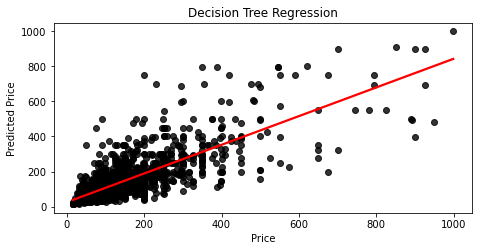

In [54]:
# Run a Decision Tree Regressor with all attributes as a benchmark
dtr = DecisionTreeRegressor(random_state=1)

# Fit the model
dtr.fit(X_train,y_train)

# Making a prediction using the x test set
dtr_pred =dtr.predict(X_test)

# Print out the Results : accuracy and errors
print("R2:",round((dtr.score(X_test,y_test)*100),2),"%")
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, dtr_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)),2))

# Plot the Regression to see the overall data spreads
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.ylabel('Predicted Price')
sns.regplot(x=y_test,y=dtr_pred,ci=None,scatter_kws={'color':'black'},line_kws={'color':'red'})
plt.title('Decision Tree Regression')
plt.show()


# FIRST LINEAR REGRESSION WITH ALL ATTRIBUTES

R2: 51.4 %
MAE: 50.48912801916662
MSE: 5936.23260729865
RMSE: 77.04695066839861


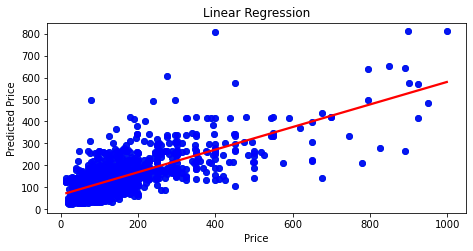

In [55]:
# Performing a Linear Regression on every attributes as benchmark
regressor = LinearRegression()

# Fit the model
regressor.fit(X_train,y_train)

# Make a prediction using the x test set 
y_pred = regressor.predict(X_test)

#Evaluate the algorithm and print out the accuracy and errors
print("R2:",round((regressor.score(X_test,y_test)*100),2),"%")
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# Plot the regression to see the spreads of the overall data
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.ylabel('Predicted Price')
sns.regplot(x=y_test,y=y_pred,ci=None,scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title('Linear Regression')
plt.show()

# Pick 5 Most Informative Attributes using Feature Selection Backward Sequential Method

In [56]:
# Run a backward sequential feature selection to find the most informative attributes
# set the k_features = 5 to find the best five attributes scored by its r squared value
sfs1 = sfs(regressor,k_features=5,forward=False,verbose=1,scoring='r2')
sfs1 = sfs1.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    3.1s finished
Features: 57/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    2.8s finished
Features: 56/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    2.3s finished
Features: 55/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.9s finished
Features: 54/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    2.2s finished
Features: 53/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    1.8s finished
Features: 52/5[Parallel(

Features: 8/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished
Features: 7/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished
Features: 6/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished
Features: 5/5

In [57]:
# Find the best 5 attributes and list it 
feat=list(sfs1.k_feature_names_)
feat

['Bathrooms',
 'Bedrooms',
 'Cleaning Fee',
 'Room Type_Private room',
 'Room Type_Shared room']

In [58]:
# Set X_most equal to the most informative five attirubtes from the above method
X_most = df_clean[['Bathrooms',
 'Bedrooms',
 'Cleaning Fee',
 'Room Type_Private room',
 'Room Type_Shared room']]

y_most = pd.DataFrame(df_clean['Price'])

# Train and Test the data sets. 
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_most,y_most,test_size=0.2,random_state=1)

# Run the Linear regression and fit it to the model
regressor1 = LinearRegression().fit(X_train1,y_train1)

# Make a prediction using the x data set
y_pred1 = regressor1.predict(X_test1)

#Evaluate the algorithm, print out the accuracy and errors
print("R2:",round((regressor1.score(X_test1,y_test1)*100),2),"%")
print("MAE:",round(metrics.mean_absolute_error(y_test1,y_pred1),2))
print("MSE:",round(metrics.mean_squared_error(y_test1,y_pred1),2))
print("RMSE:",round(np.sqrt(metrics.mean_squared_error(y_test1,y_pred1)),2))

R2: 67.93 %
MAE: 40.26
MSE: 3916.98
RMSE: 62.59


In [59]:
# Run a Decision Tree Regression
dtr1 = DecisionTreeRegressor(random_state=1)

# Fit the model 
dtr1.fit(X_train1,y_train1)

# Making prediction
dtr_pred1 =dtr1.predict(X_test1)

# Evaluate the algorithm, print out the accuracy and errors
print("R2:",round((dtr1.score(X_test1,y_test1)*100),2),"%")
print('MAE:', round(metrics.mean_absolute_error(y_test1, dtr_pred1),2))
print('MSE:', round(metrics.mean_squared_error(y_test1, dtr_pred1),2))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test1, dtr_pred1)),2))

R2: 66.1 %
MAE: 36.95
MSE: 4140.61
RMSE: 64.35


# Pick 10 Most Informative Attributes using Feature Selection Backward Sequential Method

In [60]:
sfs1 = sfs(regressor,k_features=10,forward=False,verbose=1,scoring='r2')
sfs1 = sfs1.fit(X,y)
feat=list(sfs1.k_feature_names_)
feat

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    2.1s finished
Features: 57/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    2.0s finished
Features: 56/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    1.9s finished
Features: 55/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.9s finished
Features: 54/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.8s finished
Features: 53/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    1.8s finished
Features: 52/10[Par

['Accommodates',
 'Bathrooms',
 'Bedrooms',
 'Cleaning Fee',
 'Availability 90',
 'Review Scores Location',
 'Dist_to_Airp',
 'Property Type_House',
 'Room Type_Private room',
 'Room Type_Shared room']

/Users/nishantparate/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but LinearRegression was fitted without feature names

/Users/nishantparate/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



R2: 70.26 %
MAE: 38.41
MSE: 3632.87
RMSE: 60.27


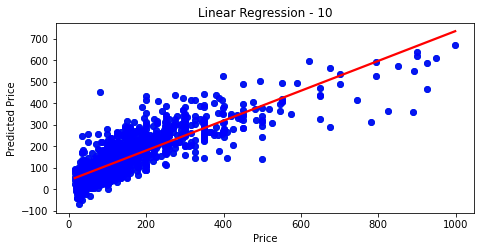

In [61]:
### X_most is equal to the 10 most informative attributes picked from the method above
X_most1 = df_clean[['Accommodates','Bathrooms',
 'Bedrooms',
 'Cleaning Fee',
 'Availability 90',
 'Review Scores Location',
 'Dist_to_Airp',
 'Property Type_House',
 'Room Type_Private room',
 'Room Type_Shared room']]

y_most1 = pd.DataFrame(df_clean['Price'])

# Train and Test the data
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_most1,y_most1,test_size=0.2,random_state=1)

# Run a linear regression and fit the model
regressor1 = LinearRegression().fit(X_train1.values,y_train1)

# Predict the y using the X test set
y_pred1 = regressor1.predict(X_test1)

#Evaluate the algorithm and print out the accuracy and erros
print("R2:",round((regressor1.score(X_test1,y_test1)*100),2),"%")
print("MAE:",round(metrics.mean_absolute_error(y_test1,y_pred1),2))
print("MSE:",round(metrics.mean_squared_error(y_test1,y_pred1),2))
print("RMSE:",round(np.sqrt(metrics.mean_squared_error(y_test1,y_pred1)),2))

# plot to see the spreads of the datasets
plt.scatter(y_test1,y_pred1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression - 10')
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.ylabel('Predicted Price')  
sns.regplot(x=y_test1,y=y_pred1,ci=None,scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.show()

In [62]:
# Run a decision tree regression
dtr1 = DecisionTreeRegressor(random_state=1)

# Fit the model 
dtr1.fit(X_train1,y_train1)

# Making a prediction
dtr_pred1 =dtr1.predict(X_test1)

## Evaluate model and print out the accuracy and erros
print("R2:",round((dtr1.score(X_test1,y_test1)*100),2),"%")
print('MAE:', round(metrics.mean_absolute_error(y_test1, dtr_pred1),2))
print('MSE:', round(metrics.mean_squared_error(y_test1, dtr_pred1),2))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test1, dtr_pred1)),2))

R2: 44.43 %
MAE: 45.65
MSE: 6787.63
RMSE: 82.39


# Select 10 attributes using SelecKBest's Forward Method

In [63]:
# find the most informative attributes using SelectKBest method
select = SelectKBest(score_func=f_regression,k=10)
# Fit the model 
z = select.fit(X_train,y_train)
X_train_new = select.transform(X_train)
X_train_new.shape
kept_feat = pd.DataFrame({'columns': X_train.columns, 'kept': select.get_support()})
# Print out the list of the attributes
kept_feat
# new dataframe with the most informative attributes
new_df = X_train.iloc[:,select.get_support()]
new_df.columns

/Users/nishantparate/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Index(['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Cleaning Fee',
       'No_Amenities', 'Property Type_House', 'Room Type_Entire home/apt',
       'Room Type_Private room', 'Room Type_Shared room'],
      dtype='object')

In [64]:
# X_most2 is equal to the top 10 attributes picked out by using the method above
X_most2 = df_clean[['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Cleaning Fee',
       'No_Amenities', 'Property Type_House', 'Room Type_Entire home/apt',
       'Room Type_Private room', 'Room Type_Shared room']]

y_most2 = pd.DataFrame(df_clean['Price'])

# Train and Test the datset
X_train2, X_test2,y_train2,y_test2 = train_test_split(X_most2,y_most2,test_size=0.2,random_state=1)

# Run the linear regression and fit the model
regressor2 = LinearRegression().fit(X_train2,y_train2)

# Predict the outcome
y_pred2 = regressor2.predict(X_test2)

#Evaluate the algorithm and print out the accuracy and errors
print("R2:",round((regressor2.score(X_test2,y_test2)*100),2),"%")
print("MAE:",metrics.mean_absolute_error(y_test2,y_pred2))
print("MSE:",metrics.mean_squared_error(y_test2,y_pred2))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test2,y_pred2)))

R2: 68.54 %
MAE: 39.636594696308336
MSE: 3842.56297759937
RMSE: 61.98841002638614


In [65]:
# Run decision tree regression
dtr2 = DecisionTreeRegressor(random_state=1)

# Fit the model 
dtr2.fit(X_train2,y_train2)

# Making a prediction
dtr_pred2 =dtr2.predict(X_test2)

# Evaluate the algorithm, print out accuracy and errors
print("R2:",round((dtr2.score(X_test2,y_test2)*100),2),"%")
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test2, dtr_pred2),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test2, dtr_pred2),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test2, dtr_pred2)),2))

R2: 53.83 %
Mean Absolute Error: 42.77
Mean Squared Error: 5639.96
Root Mean Squared Error: 75.1


# Select 5 attributes using SelecKBest's Forward Method

In [66]:
# Find the top 5 attributes using the forward method
select = SelectKBest(score_func=f_regression,k=5)
z = select.fit(X_train,y_train)
X_train_new = select.transform(X_train)
X_train_new.shape
kept_feat = pd.DataFrame({'columns': X_train.columns, 'kept': select.get_support()})
kept_feat
# new dataframe with the msot informative attributes
new_df = X_train.iloc[:,select.get_support()]
new_df.columns

/Users/nishantparate/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Index(['Accommodates', 'Bedrooms', 'Beds', 'Cleaning Fee',
       'Room Type_Entire home/apt'],
      dtype='object')

In [67]:
# X_most_3 is equal to the top 5 attributes 
X_most_3 = df_clean[['Accommodates', 'Bedrooms', 'Beds', 'Cleaning Fee',
       'Room Type_Entire home/apt']]

y_most_3 = pd.DataFrame(df_clean['Price'])

# Train and Test the dataset
X_train3, X_test3,y_train3,y_test3 = train_test_split(X_most_3,y_most_3,test_size=0.2,random_state=1)

# Run linear regression and fit the model
regressor3 = LinearRegression().fit(X_train3,y_train3)

# Making a prediction
y_pred3 = regressor3.predict(X_test3)

#Evaluate the algorithm and print out the accuracy and errors
print("R2:",round((regressor3.score(X_test3,y_test3)*100),2),"%")
print("MAE:",metrics.mean_absolute_error(y_test3,y_pred3))
print("MSE:",metrics.mean_squared_error(y_test3,y_pred3))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test3,y_pred3)))

# coef3 = pd.concat([pd.DataFrame(X_train3.columns),pd.DataFrame(np.transpose(regressor3.coef_))],axis=1)
# print("Coefficients:",coef3)
# coef3

R2: 66.38 %
MAE: 40.76234057013736
MSE: 4106.9636072537305
RMSE: 64.08559594209709


In [68]:
# Run decision tree regerssion
dtr3 = DecisionTreeRegressor(random_state=1)

# Fit the model
dtr3.fit(X_train3,y_train3)

#making prediction
dtr_pred3 =dtr3.predict(X_test3)

# Evaluate the model, print out the accuracy and errors
print("R2:",round((dtr3.score(X_test3,y_test3)*100),2),"%")
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test3, dtr_pred3),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test3, dtr_pred3),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test3, dtr_pred3)),2))

R2: 57.55 %
Mean Absolute Error: 40.22
Mean Squared Error: 5184.92
Root Mean Squared Error: 72.01


In [69]:
# Append a new datapoint by manually inputting the data
# Input the data for the following attributes in same order'Accommodates','Bathrooms','Bedrooms','Cleaning Fee',
#'Availability 90','Review Scores Location','Dist_to_Airp','Property Type_House','Room Type_Private room','Room Type_Shared room'

newInput = [[3,2,2,30,1,9,5,1,0,0]]

# Predict the price based on the newInput by using our best model
pricePredict = regressor1.predict(newInput)
pricePredict 

array([[148.48273889]])